In [51]:
import pandas as pd
import os
import random
import gensim.models.doc2vec
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from gensim.models.doc2vec import Doc2Vec
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import networkx as nx
from random import randint 
from itertools import count
import networkx as nx
import csv
from csv import reader
import sys
import csv
csv.field_size_limit(256<<10)
csv.field_size_limit()
import codecs
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gensim
from collections import defaultdict
#import gensim.utils.lemmatize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# read in the data using Pandas
data = pd.read_csv('./data-source/bostonglobe2018.csv')

In [53]:
# strip the text of unnecessary whitespaces and removing special characters
def custom_standardization(data):

    spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+",",",
                  "-",".","/",":",";","<", "=",">","?","@","[",
                  "\\","]","^","_", "`","{","|","}","~","–", 
                  "\xc2", "\xa0", "\x80", "\x9c", "\x99", "\x94", 
                  "\xad", "\xe2", "\x9d", "\n"]

    for char in spec_chars:
        data['text'] = data['text'].str.strip()
        data['text'] = data['text'].str.replace(char, ' ')
        
    return data

# do stemming before training
# compare differences between word vectors for 'black' as well as 'white' to better identify biased representations
# think about word frequency, so that context isn't specific, but rather, general
# increase data point size for visualizations

# instead of keywords, use sub-neighborhood names

# cluster similar words
# visualize those with a meta word that's representative
# either use average word vectors or minimizing function to get representative word

In [54]:
df = custom_standardization(data)

<ipython-input-53-28d23ad85609>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['text'] = data['text'].str.replace(char, ' ')


In [55]:
# turn DataFrame into a list of lists of tokens
documents = []
mentions = {'hyde_park': 0, 'beacon_hill': 0, 'south_boston': 0, 'jamaica_plain': 0, 'east_boston': 0,
           'south_end': 0, 'back_bay': 0, 'north_end': 0, 'west_roxbury': 0, 'mission_hill': 0,
           'harbor_islands': 0, 'west_end': 0, 'south_boston_waterfront': 0, 'longwood_medical_area': 0,
           'dorchester': 0, 'roxbury': 0, 'downtown': 0, 'fenway': 0, 'mattapan': 0, 'brighton': 0,
           'charlestown': 0, 'roslindale': 0, 'allston': 0}
for row in df.values:
    [row] = row
    temp = row.lower().split()
    length = len(temp) - 1
    for i in range(length):
        if temp[i] == 'hyde' and temp[i + 1] == 'park':
            temp[i] = 'hyde_park'
            temp.pop(i + 1)
            length -= 1
            mentions['hyde_park'] += 1
        elif temp[i] == 'dorchester':
            mentions['dorchester'] += 1
        elif temp[i] == 'roxbury':
            mentions['roxbury'] += 1
        elif temp[i] == 'downtown':
            mentions['downtown'] += 1
        elif temp[i] == 'fenway':
            mentions['fenway'] += 1
        elif temp[i] == 'mattapan':
            mentions['mattapan'] += 1
        elif temp[i] == 'brighton':
            mentions['brighton'] += 1
        elif temp[i] == 'charlestown':
            mentions['charlestown'] += 1
        elif temp[i] == 'roslindale':
            mentions['roslindale'] += 1
        elif temp[i] == 'allston':
            mentions['allston'] += 1
        elif temp[i] == 'beacon' and temp[i + 1] == 'hill':
            temp[i] = 'beacon_hill'
            temp.pop(i + 1)
            length -= 1
            mentions['beacon_hill'] += 1
        elif temp[i] == 'south' and temp[i + 1] == 'boston':
            temp[i] = 'south_boston'
            temp.pop(i + 1)
            length -= 1
            mentions['south_boston'] += 1
        elif temp[i] == 'jamaica' and temp[i + 1] == 'plain':
            temp[i] = 'jamaica_plain'
            temp.pop(i + 1)
            length -= 1
            mentions['jamaica_plain'] += 1
        elif temp[i] == 'east' and temp[i + 1] == 'boston':
            temp[i] = 'east_boston'
            temp.pop(i + 1)
            length -= 1
            mentions['east_boston'] += 1
        elif temp[i] == 'south' and temp[i + 1] == 'end':
            temp[i] = 'south_end'
            temp.pop(i + 1)
            length -= 1
            mentions['south_end'] += 1
        elif temp[i] == 'back' and temp[i + 1] == 'bay':
            temp[i] = 'back_bay'
            temp.pop(i + 1)
            length -= 1
            mentions['back_bay'] += 1
        elif temp[i] == 'north' and temp[i + 1] == 'end':
            temp[i] = 'north_end'
            temp.pop(i + 1)
            length -= 1
            mentions['north_end'] += 1
        elif temp[i] == 'west' and temp[i + 1] == 'roxbury':
            temp[i] = 'west_roxbury'
            temp.pop(i + 1)
            length -= 1
            mentions['west_roxbury'] += 1
        elif temp[i] == 'mission' and temp[i + 1] == 'hill':
            temp[i] = 'mission_hill'
            temp.pop(i + 1)
            length -= 1
            mentions['mission_hill'] += 1
        elif temp[i] == 'harbor' and temp[i + 1] == 'islands':
            temp[i] = 'harbor_islands'
            temp.pop(i + 1)
            length -= 1
            mentions['harbor_islands'] += 1
        elif temp[i] == 'west' and temp[i + 1] == 'end':
            temp[i] = 'west_end'
            temp.pop(i + 1)
            length -= 1
            mentions['west_end'] += 1
        elif i > 0 and temp[i - 1] == 'south' and temp[i] == 'boston' and temp[i + 1] == 'waterfront':
            temp[i - 1] = 'south_boston_waterfront'
            temp.pop(i + 1)
            temp.pop(i)
            length -= 2
            mentions['south_boston_waterfront'] += 1
        elif i > 0 and temp[i - 1] == 'longwood' and temp[i] == 'medical' and temp[i + 1] == 'area':
            temp[i - 1] = 'longwood_medical_area'
            temp.pop(i + 1)
            temp.pop(i)
            length -= 1
            mentions['longwood_medical_area'] += 1
        elif i >= length - 3:
            break
    documents.append(temp)
    #print(len(documents))

In [56]:
# create Word2Vec model

# convert the tokenized data into one big list of tokens, as opposed to a list of tokenized articles
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
data_for_training = list(tagged_document(documents))

# the skip-grams method is used here, with a window of 10
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
model.build_vocab(data_for_training)  # prepare the model vocabulary
# train model on available data
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)
#vector = model.infer_vector(keywords)

In [57]:
# words of interest
# some words are missing in the final 'keywords' list since those do not occur in any of the articles

#black_keywords = ['man', 'woman', 'men', 'women', 'male', 'female', 'person', 'people', 'community', 
#                  'neighborhood', 'child', 'children', 'kid', 'youth', 'business', 'company']

#black_ethnicities = ['black', 'cape verdean', 'afro latino', 'afro latina', 'haitian', 'african american', 
#                     'african-american', 'caribbean', 'jamaican', 'dominican', 'west indian']

black_neighborhoods = ['dorchester', 'roxbury', 'mattapan', 'hyde_park']
white_neighborhoods = ['fenway', 'beacon_hill', 'downtown', 'south_boston', 'east_boston', 'back_bay', 'jamaica_plain',
                      'south_end', 'charlestown', 'brighton', 'allston', 'west_end', 'roslindale', 'north_end',
                      'mission_hill', 
                       #'south_boston_waterfront', 
                       'harbor_islands', 'longwood_medical_area']

keywords = black_neighborhoods + white_neighborhoods

In [58]:
#finding similar words and creating a csv file

def compute_similar_words(model,source_word, topn=5):
    similar_words = [source_word]
    try:
        top_words = model.wv.most_similar(source_word,topn=topn)
        similar_words.extend([val[0] for val in top_words])
    except KeyError as err:
        print(err.args)
    return similar_words    

def compute_similar_words_for_all_tasks(model,topn=5):
    columns = ['word'+str(i-1) for i in range(1,topn+2)]
    df = pd.DataFrame(data=None,columns=columns)
    for source_word in keywords:
        similar_words = compute_similar_words(model,source_word,topn)
        df.loc[len(df)] = similar_words
    for i in range(1,len(similar_words)):
        sec_similar_words = compute_similar_words(model,similar_words[i],topn)
        df.loc[len(df)] = sec_similar_words
    df.to_csv('./similar_words_task/Neighbor_50%/similar_words_task_2018.csv')

words = compute_similar_words_for_all_tasks(model)

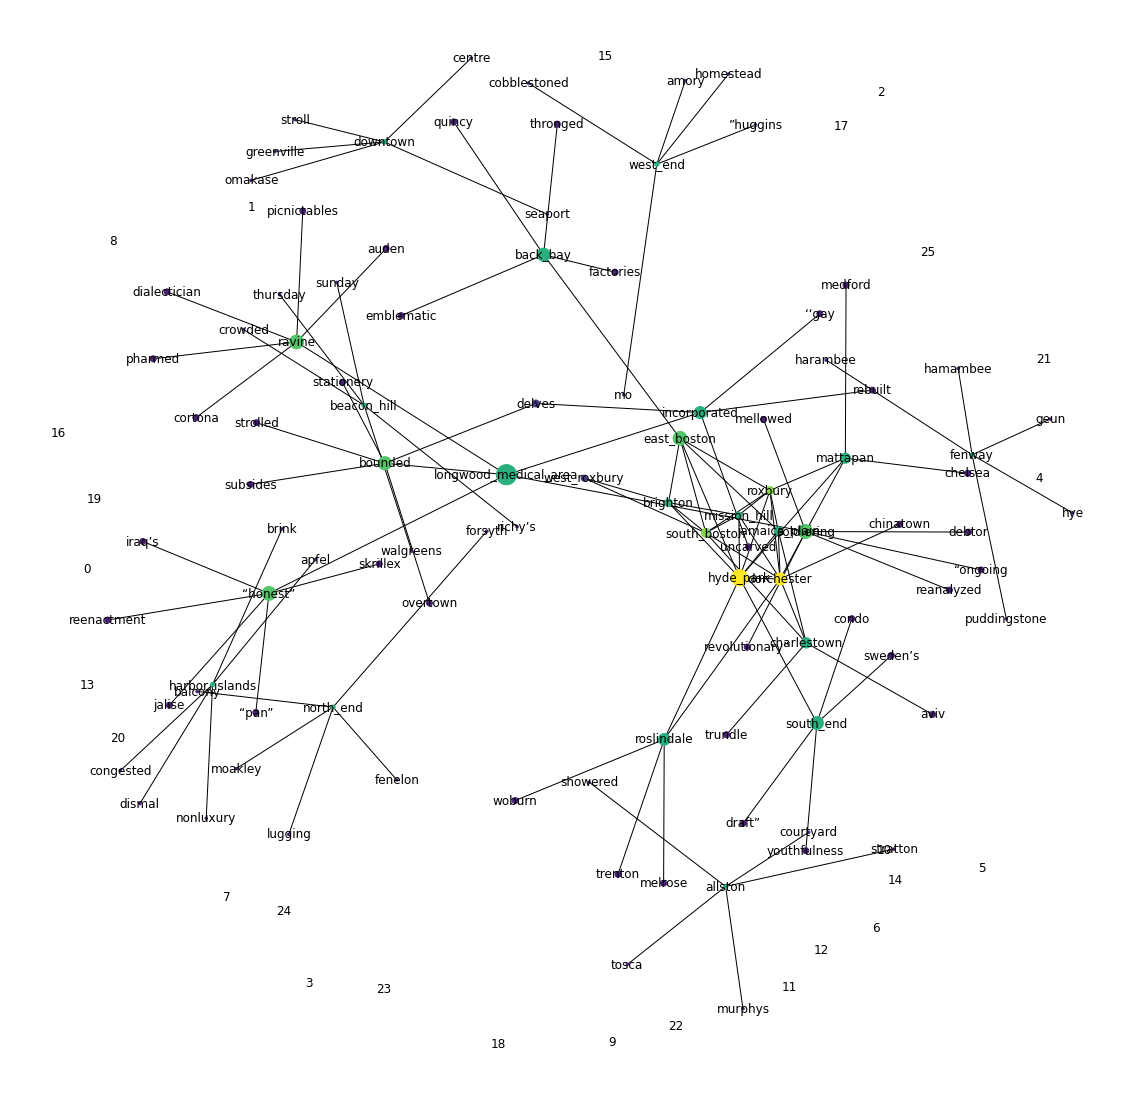

In [59]:
#read in similar words csv file to create WordClouds

words = pd.read_csv('./similar_words_task/Neighbor_50%/similar_words_task_2018.csv')
G = nx.Graph()
j = 1
for i, row in words.iterrows():
    for j in range(1,len(row)):
        G.add_node(i,label=row[j])
    for j in range(1,len(row)):
        G.add_edge(row[1], row[j])
remove = [node for node,degree in dict(G.degree()).items() if degree > 2]
# print(remove)
pos = nx.spring_layout(G,k=0.3)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )

model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)
plt.axis('off')
plt.savefig('../img/Neighbor_50%/Neighbor_graph_2018.png')
plt.show()

In [60]:
freq = pd.Series(mentions)
freq = freq.sort_values(ascending=False)
freq.to_csv('../model/frequency_neighbor/2018_neighbor_freq.csv')
freq

dorchester                 4397
roxbury                    2750
south_boston               1367
mattapan                   1273
downtown                    871
south_end                   703
hyde_park                   701
jamaica_plain               660
fenway                      638
east_boston                 617
roslindale                  611
west_roxbury                513
back_bay                    485
charlestown                 380
brighton                    366
beacon_hill                 347
allston                     336
mission_hill                230
north_end                   170
west_end                     53
longwood_medical_area        23
harbor_islands               10
south_boston_waterfront       0
dtype: int64